# Project Business Statistics: Delivery Routing A/B Test


## Define Problem Statement and Objectives

**Contex:**

The company initiated an A/B testing experiment, to determine whether the new program achieve a better delivery time based on measurable outcomes.

**Objectives:**

Enginiering  team has created a new routing system  featuring and updated to achieve a better delivery time compared to current system.
To test its effectiviness in reducing time delivering, the Data Science team conducted an A/B test by:

 - Randomly selecting 1000 deliveries.

 - Dividing them equally into two groups: the A group (using the current
   routing system) and the B group (using the new routing system)

 - Focusing on delivery time outcomes ranging from 19 to 115 minutes.   

As data scientists, our task is to perform statistical analysis (α = 0.05) to determine whether the new routing method leads to statistically and practically significant improvements.

Key Research Questions:

**1- Does the new routing method (group B) significantly reduce delivery time compared to group A?**

**2- Does traffic condition impact average delivery time for the new routing system B?**






## Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind


## Reading the Data into a DataFrame

In [ ]:
#loading dataset
df=pd.read_csv('delivery_routing_ab_test.csv')
df.head()

,delivery_id,group,distance_km,time_of_day,vehicle_type,traffic_conditions,delivery_time_min
0,A_0,A,17.48,Afternoon,Van,Medium,60.59
1,A_1,A,14.31,Night,Van,Heavy,66.38
2,A_2,A,18.24,Afternoon,Van,Light,70.06
3,A_3,A,22.62,Evening,Van,Light,76.99
4,A_4,A,13.83,Night,Truck,Light,75.16


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   delivery_id         1000 non-null   object 
 1   group               1000 non-null   object 
 2   distance_km         1000 non-null   float64
 3   time_of_day         1000 non-null   object 
 4   vehicle_type        1000 non-null   object 
 5   traffic_conditions  1000 non-null   object 
 6   delivery_time_min   1000 non-null   float64
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
df['group'].value_counts()

,count
group,
A,500
B,500


In [ ]:
#search for duplicates values
df.duplicated().sum()

np.int64(0)

In [ ]:
df['delivery_time_min'].nunique()

919

In [ ]:
df['distance_km'].nunique()

768

In [ ]:
df['time_of_day'].value_counts()

,count
time_of_day,
Evening,257
Morning,256
Afternoon,252
Night,235


In [ ]:
df['traffic_conditions'].value_counts()

,count
traffic_conditions,
Medium,506
Light,305
Heavy,189


In [ ]:
df['vehicle_type'].value_counts()

,count
vehicle_type,
Van,589
Truck,312
Motorcycle,99


### Univariate Analysis

In [ ]:
df.columns

Index(['delivery_id', 'group', 'distance_km', 'time_of_day', 'vehicle_type',
       'traffic_conditions', 'delivery_time_min'],
      dtype='object')

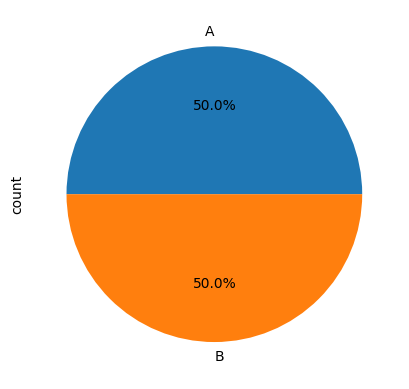

In [ ]:
#plotting group with its %
df['group'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Observations:
The A group and B group each represent exactly 50% of the data.

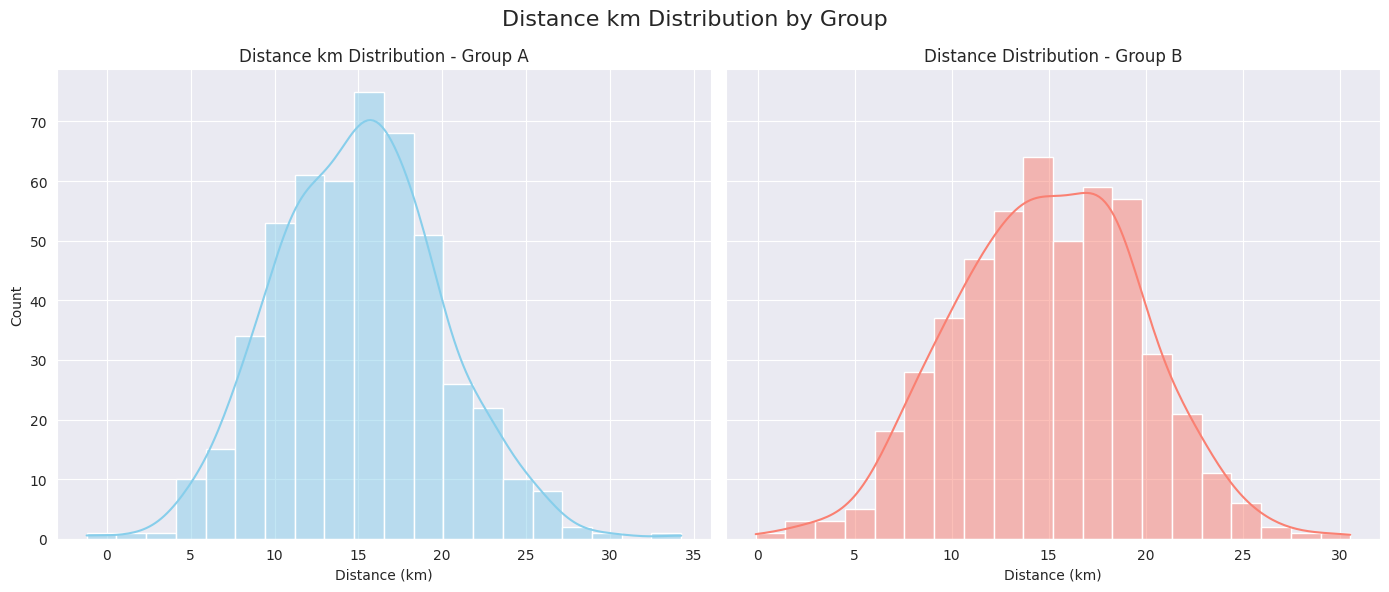

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group A histogram
sns.histplot(df[df['group'] == 'A']['distance_km'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distance km Distribution - Group A')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Count')

# Group B histogram
sns.histplot(df[df['group'] == 'B']['distance_km'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distance Distribution - Group B')
axes[1].set_xlabel('Distance (km)')

# Final layout
plt.suptitle('Distance km Distribution by Group', fontsize=16)
plt.tight_layout()
plt.show()


**Observations:**

Group A (Actual System)

* Delivery distances are more spread out, with a larger tail towards higher
  distances (right-skewed).

* Average delivery distance is slightly higher.

Group B (New System)

* More concentrated around the center(~15 km), indicating a tighter
 distribution.



Group B appears to deliver more consistently over similar distances.


<ipython-input-16-01e459633a48>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df[df['group'] == 'A'], x='time_of_day', palette='pastel', ax=axes[0])
<ipython-input-16-01e459633a48>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df[df['group'] == 'B'], x='time_of_day', palette='pastel', ax=axes[1])


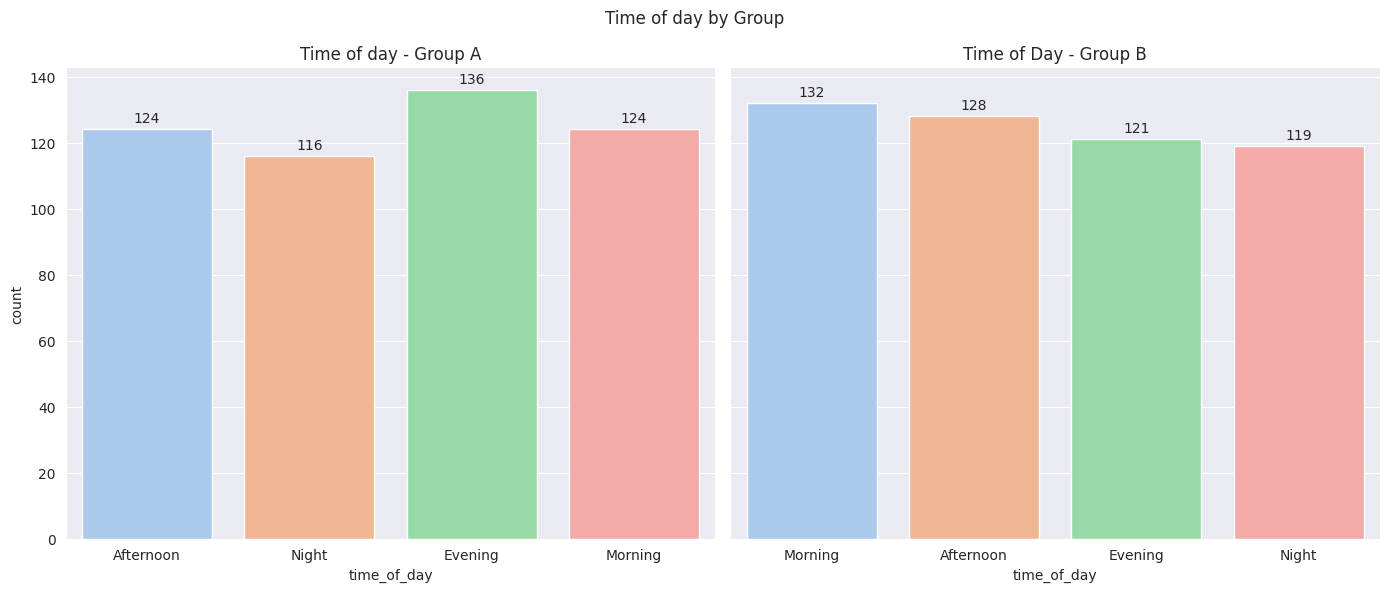

In [ ]:

# Set the style
sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group A
ax1 = sns.countplot(data=df[df['group'] == 'A'], x='time_of_day', palette='pastel', ax=axes[0])
ax1.set_title('Time of day - Group A')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Group B
ax2 = sns.countplot(data=df[df['group'] == 'B'], x='time_of_day', palette='pastel', ax=axes[1])
ax2.set_title('Time of Day - Group B')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final formatting
fig.suptitle('Time of day by Group')
plt.tight_layout()
plt.show()

**Observations:**

Group A (Actual System)

* More shipments during Evenings.


Group B (New System)

* More deliveries during Mornings and Afternoons.

The groups are well balanced in terms of time day.


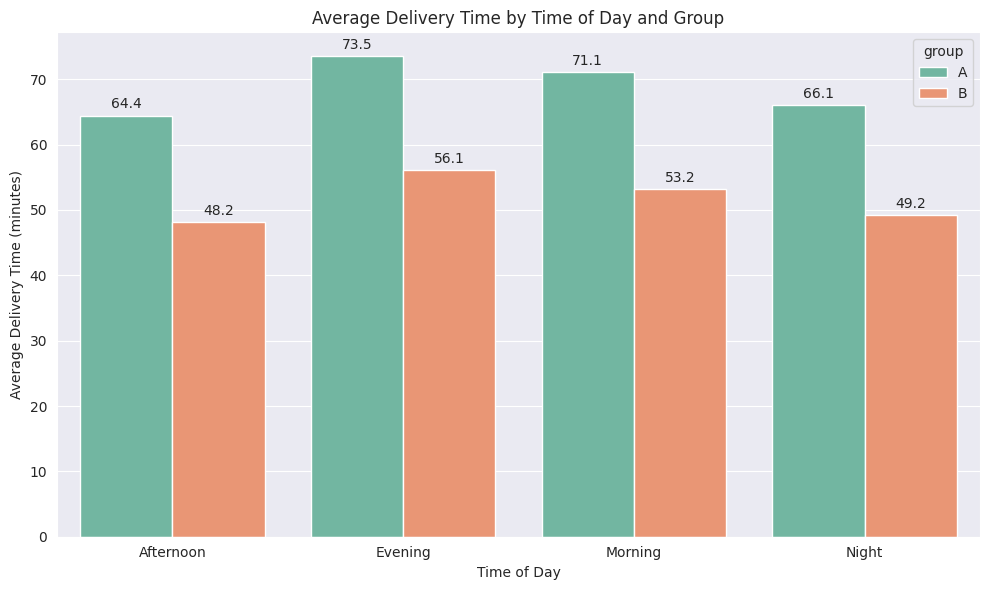

In [ ]:
# Group by 'group' and 'time_of_day' and calculate mean delivery time
avg_delivery = df.groupby(['group', 'time_of_day'])['delivery_time_min'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_delivery, x='time_of_day', y='delivery_time_min', hue='group', palette='Set2')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

# Final formatting
plt.title('Average Delivery Time by Time of Day and Group')
plt.ylabel('Average Delivery Time (minutes)')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()



Observations:

* The average of deliveries by time of day and group.
  - Evenings   A (73.5 ) B (56.10 )
  - Mornings   A (71.10 ) B (53.20 )
  - Afternoons A (64.40 ) B (48.20 )   
  - Nights     A (66.10 ) B (49.20 )

Group B performs better than group A in all categories.


<ipython-input-19-8cddcea12ff3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df[df['group'] == 'A'], x='vehicle_type', palette='pastel', ax=axes[0])
<ipython-input-19-8cddcea12ff3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df[df['group'] == 'B'], x='vehicle_type', palette='pastel', ax=axes[1])


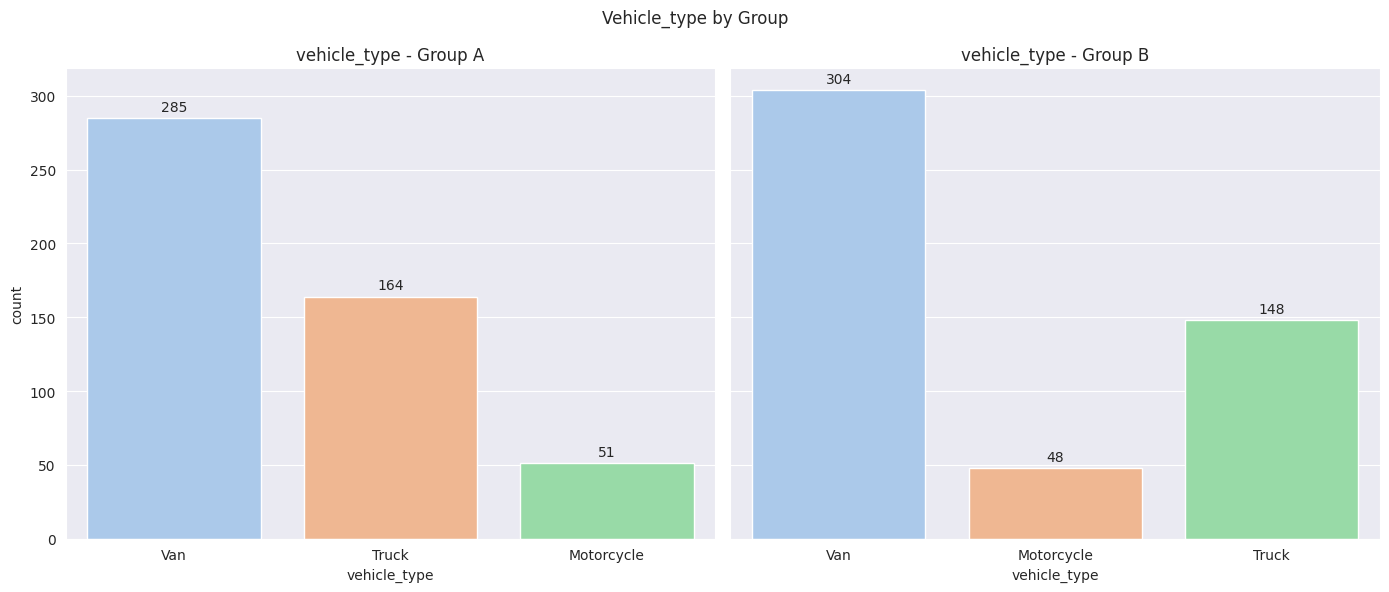

In [ ]:

# Set the style
sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group A
ax1 = sns.countplot(data=df[df['group'] == 'A'], x='vehicle_type', palette='pastel', ax=axes[0])
ax1.set_title('vehicle_type - Group A')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Group B
ax2 = sns.countplot(data=df[df['group'] == 'B'], x='vehicle_type', palette='pastel', ax=axes[1])
ax2.set_title('vehicle_type - Group B')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final formatting
fig.suptitle('Vehicle_type by Group')
plt.tight_layout()
plt.show()


**Observations:**

Group A (Actual System)

* Vans are the most common delivery vehicle (285 deliveries).
* Trucks are the seconde (164) and motorcycles are the least used (51).

Group B (New System)

* Also dominated by vans (304 deliveries).
* Truck usage is slightly reduced (148 vs. 164 in group A)

The new routing system maintained a similar vehicle type distribution to the current system.

Slight increase in van and decrease in truck and motorcycle in group B may contribute to improved agility and shorter delivery times.


<ipython-input-21-0913329034fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df[df['group'] == 'A'], x='traffic_conditions', palette='pastel', ax=axes[0])
<ipython-input-21-0913329034fc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df[df['group'] == 'B'], x='traffic_conditions', palette='pastel', ax=axes[1])


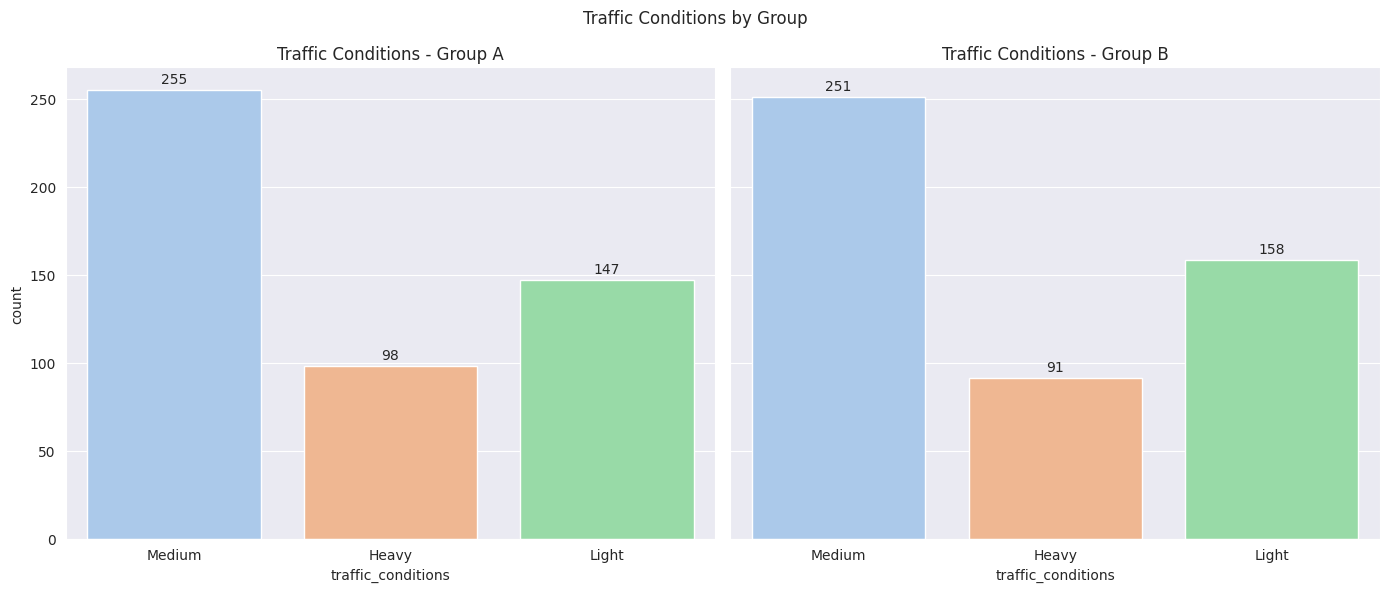

In [ ]:

# Set the style
sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group A
ax1 = sns.countplot(data=df[df['group'] == 'A'], x='traffic_conditions', palette='pastel', ax=axes[0])
ax1.set_title('Traffic Conditions - Group A')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Group B
ax2 = sns.countplot(data=df[df['group'] == 'B'], x='traffic_conditions', palette='pastel', ax=axes[1])
ax2.set_title('Traffic Conditions - Group B')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final formatting
fig.suptitle('Traffic Conditions by Group')
plt.tight_layout()
plt.show()


**Observations:**

Group A (Actual System)

* Mediums is the most common traffic conditions for deliveries, light is the second one (147) and heavy the least used(147)


Group B (New System)

* Traffic conditions are well balanced, having a reduction in medium and heavy
  and an increase for light. This may contribute to improve deliveries time.  


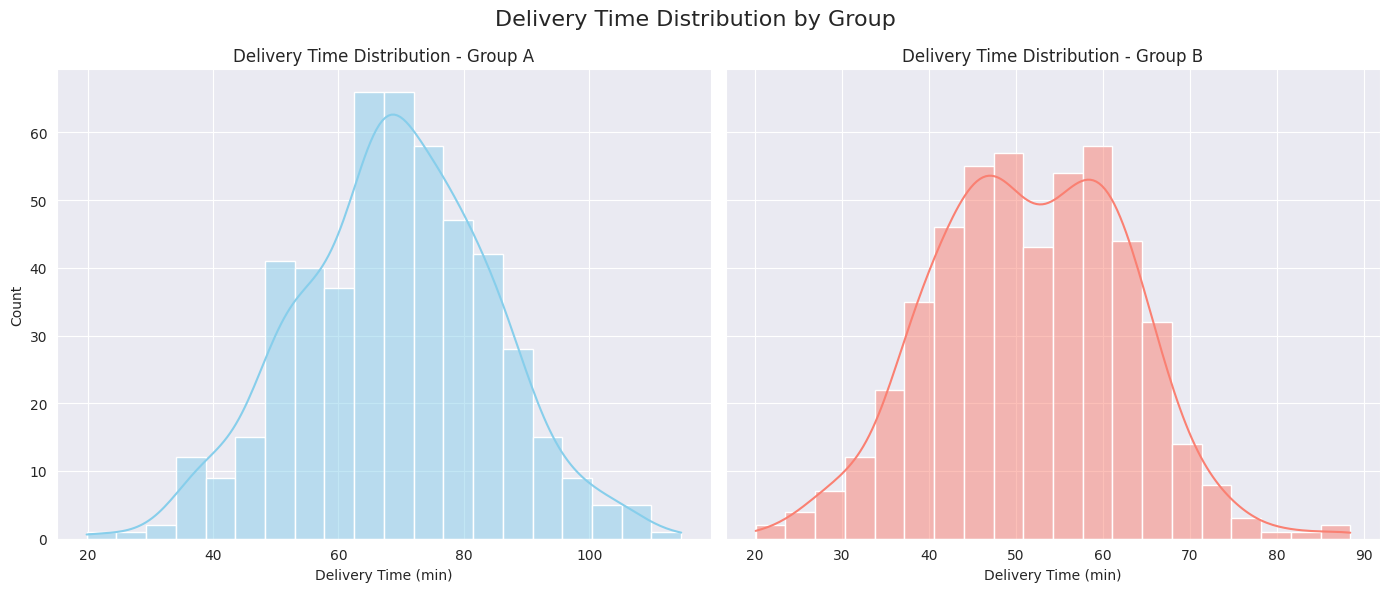

In [ ]:

# Set the style
sns.set_style('darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Group A histogram
sns.histplot(df[df['group'] == 'A']['delivery_time_min'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Delivery Time Distribution - Group A')
axes[0].set_xlabel('Delivery Time (min)')
axes[0].set_ylabel('Count')

# Group B histogram
sns.histplot(df[df['group'] == 'B']['delivery_time_min'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Delivery Time Distribution - Group B')
axes[1].set_xlabel('Delivery Time (min)')

# Final layout
plt.suptitle('Delivery Time Distribution by Group', fontsize=16)
plt.tight_layout()
plt.show()


**Observations:**

Group A (Actual System)

* Delivery distances are more spread out, with a larger tail towards higher
  distances (left-skewed).

* Average delivery time is slightly higher.

Group B (New System)

* The majority of deliveries are between 40 and 70 minutes.



Group B demostrates more efficient and consistent delivery times, this support that the new system may be more effective.

### Bivariate Analysis

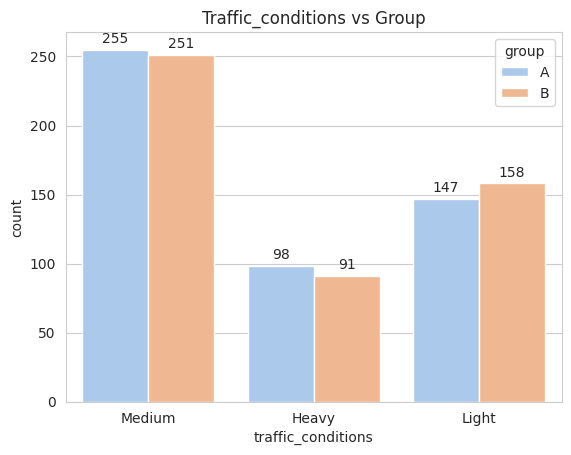

In [ ]:
#plotting traffic_conditions column with hue group

sns.set_style('whitegrid')
ax= sns.countplot(data=df,x='traffic_conditions', hue='group',palette='pastel')

#add labels
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=3)

plt.title('Traffic_conditions vs Group')
plt.show()

**Observations:**

* Group B is better balanced than group A, having more deliveries on light traffic conditions.

In [ ]:
#getting avg delivery time per group by time_of_day with 2 decimals
df.groupby(['time_of_day','group'])['delivery_time_min'].mean().round(2)

time_of_day  group
Afternoon    A        64.43
             B        48.16
Evening      A        73.50
             B        56.14
Morning      A        71.14
             B        53.20
Night        A        66.10
             B        49.18
Name: delivery_time_min, dtype: float64

<Axes: xlabel='time_of_day', ylabel='delivery_time_min'>

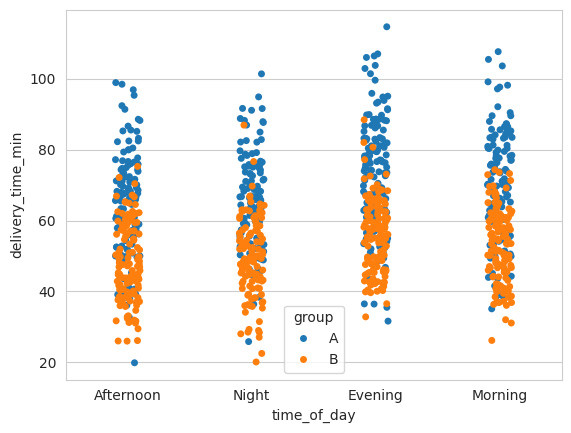

In [ ]:
#stripplot for time of day and delivery time min by group
sns.stripplot(data=df, x="time_of_day", y="delivery_time_min", hue='group')

**Observations:**

* Across all time-of-day categories,** group B** consistently shows **lower** **delivery times** than group A.

* Group B are spread out, indicating variability and occasional delays.




<Axes: xlabel='distance_km', ylabel='delivery_time_min'>

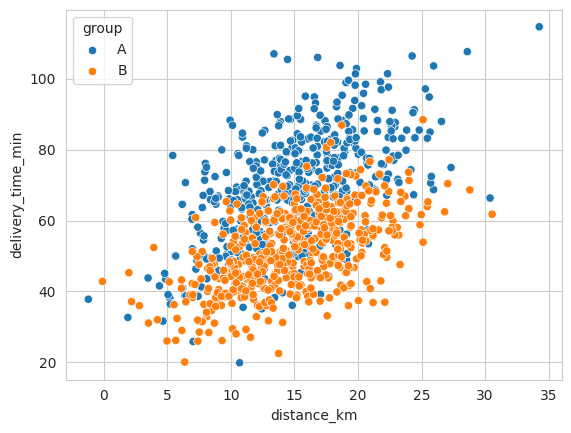

In [ ]:
#scatter plot for distance km and delivery tim min by groups
sns.scatterplot(data=df, x="distance_km", y="delivery_time_min", hue='group')

**Observations:**

* A clear positve correlation exists between delivery distance and delivery  
  time accross both groups.

* Group A exhibits longer delivery times acrross almost the entire distance
  range.

* Group B outperforms group A even as delivery distances increase, indicating
  better optimization in routing.

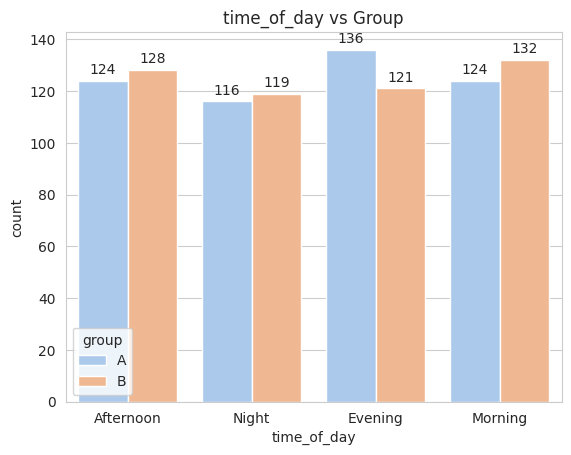

In [ ]:
#plotting shpments by time of day
sns.set_style('whitegrid')
ax= sns.countplot(data=df,x='time_of_day', hue='group',palette='pastel')

#add labels
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=3)

plt.title('time_of_day vs Group')
plt.show()

**Observations:**

* Group A has more deliveries during Evenings, which correspond to higher
  average delivery times.

* Group B has relatively more deliveries during Mornings and Afternoos, which
 are the periods with generally lower delivery times.

This suggest the routing system migh be;

 - Better optimized.

 - Making smarter scheduling decisions.

 - Contributing to lower delivery times overall.

## Power of Analysis

In [ ]:
from statsmodels.stats.power import TTestIndPower

# Parameters
effect_size = 0.5  # Medium effect size (Cohen's d)
alpha = 0.05       # Significance level
power = 0.8        # Desired power

# Create power analysis object
analysis = TTestIndPower()

# Calculate required sample size per group for two-sample t-test
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required sample size per group: {sample_size:.2f}")


Required sample size per group: 63.77


Observations:
Required sample size per group " 64

Since our dataset contains 1,000 deliveries, we have strong tests statistical power.

## 1.Does the new routing method (group B) significantly reduce delivery time compared to group A?

### Perform Visual Analysis

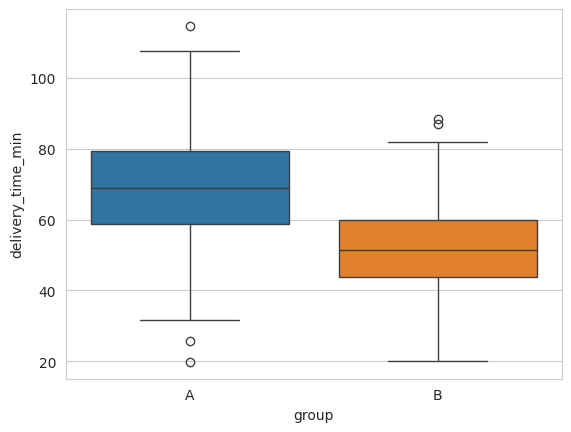

In [ ]:
#Plotting deliverey time by group
sns.boxplot(x='group', y='delivery_time_min',hue='group', data=df)
plt.show()

Observations:
 - A group (actual system) has higher median delivery time than group B (new
   system).

 - Shipments tends to take more time to be delivered using the current system.

 - Both group have outliers present.


### Step 1: Define the null and alternate hypotheses

> H₀ :  μ_A = μ_B (no difference)

> H₁: μ_A > μ_B (group B has lower mean)

### Step 2: Select Appropriate test

> Test: Independent two-sample t-test

In [ ]:
#import library
from scipy.stats import ttest_ind

### Step 3: Decide the significance level

 α = 0.05

### Step 4: Collect and prepare data

In [ ]:
#find the sample means and sample standard deviations for the two samples

#mean and std for group A and b
mean_A = df[df['group'] == 'A']['delivery_time_min'].mean()
std_A = df[df['group'] == 'A']['delivery_time_min'].std()
print(f"Group A - Mean: {mean_A:.2f}, Std: {std_A:.2f}")

mean_B = df[df['group'] == 'B']['delivery_time_min'].mean()
std_B = df[df['group'] == 'B']['delivery_time_min'].std()
print(f"Group B - Mean: {mean_B:.2f}, Std: {std_B:.2f}")

Group A - Mean: 68.95, Std: 15.36
Group B - Mean: 51.67, Std: 11.05


In [ ]:
#gettin data for grou A and B
group_A = df[df['group'] == 'A']['delivery_time_min']
group_B = df[df['group'] == 'B']['delivery_time_min']

In [ ]:
#Shapiro test
from scipy.stats import shapiro

#shapiro test for eah group
w,p_value_A=shapiro(group_A)

print('The p_value for group A is:', p_value_A)

w,p_value_B=shapiro(group_B)
print('The p_value for group B is:', p_value_B)



The p_value for group A is: 0.7800753367748199
The p_value for group B is: 0.13636323354216207


Observations:
We fails to reject the null hypothesis.
The data follows a normal distribution.

In [ ]:
#Levene test
from scipy.stats import levene

#levene test
w,p_value=levene(group_A, group_B)

print('The p_value is:', p_value)

The p_value is: 1.7555217420959376e-09


### Step 5: Calculate the p-value

In [ ]:
#find p-value
test_stat, p_value= ttest_ind(group_B, group_A, equal_var=False)

print("P-value:", p_value)

P-value: 1.440407790905601e-76


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#Compare pvalue conclusion based on pvalue
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in delivery times between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in delivery times between the two groups.")

Reject the null hypothesis. There is a significant difference in delivery times between the two groups.


### Step 7:  Draw inference

- As pvalue is (~1.44) is less than the level significance (α = 0.05) we can
  Reject the null hypothesis.



- The statatistical evidence strongly support that the New routing system (Group B) significantly reduces delivery time compared to the current system (Group A)  

## 2.Does traffic condition impact average delivery time for the new routing system B?

### Perform Visual Analysis

In [ ]:
new_system_B=df[df['group']=='B']
new_system_B.head()

,delivery_id,group,distance_km,time_of_day,vehicle_type,traffic_conditions,delivery_time_min
500,B_0,B,11.14,Morning,Van,Medium,48.60
501,B_1,B,17.04,Afternoon,Van,Medium,44.21
502,B_2,B,10.14,Evening,Motorcycle,Heavy,45.69
503,B_3,B,8.10,Evening,Van,Light,32.80
504,B_4,B,11.87,Night,Truck,Heavy,60.86


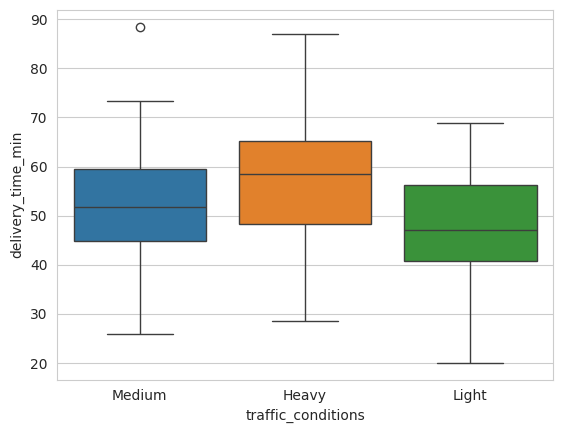

In [ ]:
#plotting traffic conditon vs delivery time
sns.boxplot(x='traffic_conditions', y='delivery_time_min',hue='traffic_conditions', data=new_system_B)
plt.show()

Observations:
- Heavy delivery time results in longer delivery time.
- Traffic conditions significantly affects delivery time

### Step 1: Define the null and alternate hypotheses

> H₀: There is no difference in average delivery times across different traffic
 conditions.

> H₁: At least one traffic condition has a significantly different average
 delivery time.

### Step 2: Select Appropriate test

> Test : one-way ANOVA

### Step 3: Decide the significance level

α = 0.05

### Step 4: Collect and prepare data

Shapiro.

In [ ]:
#Perform Shapiro
from scipy.stats import shapiro

#shapiro test
w,p_value=shapiro(new_system_B['delivery_time_min'])

print('The p_value is:', p_value)

The p_value is: 0.13636323354216207


Levene.

In [ ]:
print("Shapiro-Wilk Test for Normality:")
for condition in df['traffic_conditions'].unique():
    group = new_system_B[new_system_B['traffic_conditions'] == condition]['delivery_time_min']
    stat, p_value = shapiro(group)
    print(f"Traffic Condition: {condition}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print("✅ Data is normally distributed.\n")
    else:
        print("⚠️ Data is not normally distributed.\n")


Shapiro-Wilk Test for Normality:
Traffic Condition: Medium, p-value = 0.2021
✅ Data is normally distributed.

Traffic Condition: Heavy, p-value = 0.9259
✅ Data is normally distributed.

Traffic Condition: Light, p-value = 0.0540
✅ Data is normally distributed.



In [ ]:
groups = [new_system_B[new_system_B['traffic_conditions'] == level]['delivery_time_min'] for level in new_system_B['traffic_conditions'].unique()]
stat, p = levene(*groups)
print(f"\nLevene’s Test p-value: {p:.4f}")
if p > 0.05:
    print("✅ Variances are equal across groups.")
else:
    print("⚠️ Variances are not equal across groups.")


Levene’s Test p-value: 0.1504
✅ Variances are equal across groups.


### Step 5: Calculate the p-value

ANOVA

In [ ]:
#Perform Anova test
from scipy.stats import f_oneway

# Split group B by traffic conditions
group_B_light = new_system_B[new_system_B['traffic_conditions'] == 'Light']['delivery_time_min']
group_B_medium = new_system_B[new_system_B['traffic_conditions'] == 'Medium']['delivery_time_min']
group_B_heavy = new_system_B[new_system_B['traffic_conditions'] == 'Heavy']['delivery_time_min']

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(group_B_light, group_B_medium, group_B_heavy)

# Display results
print("P-value:",p_value)



P-value: 4.7759147364493375e-09


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Interpret result
if p_value < 0.05:
    print("✅ Reject the null hypothesis. Traffic conditions have a significant impact on delivery time.")
else:
    print("❌ Fail to reject the null hypothesis. No significant impact of traffic conditions on delivery time.")

✅ Reject the null hypothesis. Traffic conditions have a significant impact on delivery time.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Heavy  Light  -8.8095    0.0 -12.1038 -5.5153   True
 Heavy Medium  -5.0541 0.0004  -8.1172  -1.991   True
 Light Medium   3.7554 0.0016   1.2133  6.2976   True
-----------------------------------------------------


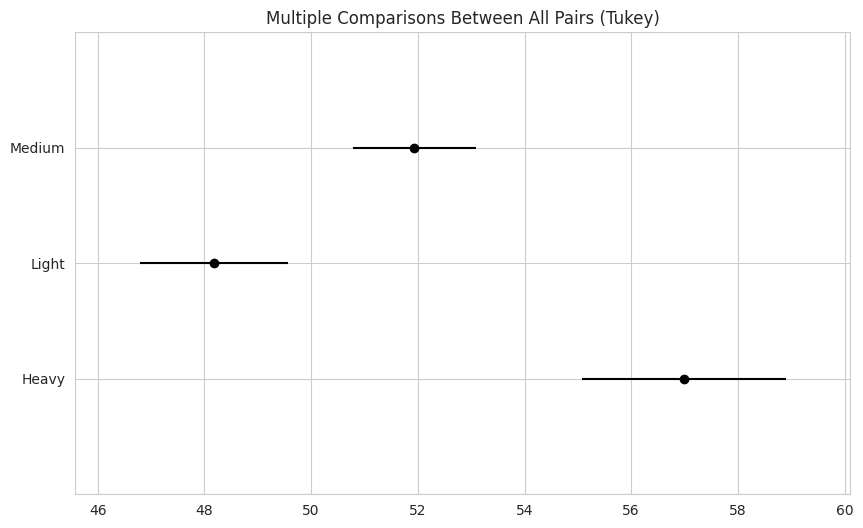

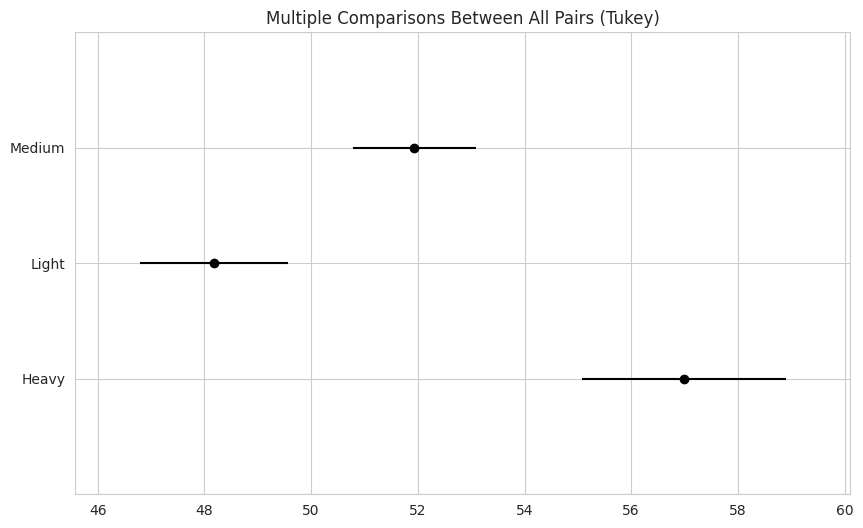

In [ ]:
#Post hoc Analysis Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(
    endog=new_system_B['delivery_time_min'],       # Dependent variable
    groups=new_system_B['traffic_conditions'],     # Factor (grouping) variable
    alpha=0.05                                      # Significance level
)

# Display the results
print(tukey_result.summary())

# Optional: plot the results
tukey_result.plot_simultaneous()

Observations:

- We can reject the null hypothesis and conclude that At least one traffic condition has a significantly different average delivery time.

- Heavy and Medium delivery times causes longer delivery times.

- Light traffic yields significantly faster delivery than Medium and Heavy.

### Step 7:  Draw inference

## Conclusion and Business Recommendations


* **Q1. Does the new routing method (group B) significantly reduce delivery time compared to group A?**

p-value: (~1.44) Decision : **Reject the null hypothesis.**
Conclusion: **Yes, New routing system reduce delivery time.**

* **2.Does traffic condition impact average delivery time for the new routing system B?**

P-value:(- 4.77) Desicion: **Reject the null hypothesis**
Conclusion: **Yes, Traffic conditions significantly influence delivery time**, specially deliveries during heavy traffic were slower than those during light and medium traffic.

**Assumptions checked:**

Normality (Shapiro-Wilk Test): p > 0.05
Equal variances (Levene's Test): p > 0.05
P-value (Anova) : -4.77
Decision: Reject Ho

Additional EDA Insights:

- Delivery time distribution:

  * Group B has a tighter and lower delivery time distribution( more concentrated between 40- 70 min)

  * Group A shows a broader spread with higher delivery times.


- Distance vs. Delivery time:

 * Group B consistently delivers faster than group A.

- Time of day:

 * Group B dispathes more during Morning and Afternoon (Typically lower traffic periods).

 * Group A has more deliveries during Evening, correlating with longer delivery
   times.

 - Traffic conditions:

  * Group B shows better handling of all traffic types, delivering faster even in medium and heavy traffic.  
    

Overall Effectiviness of the new routing system:

- Reduce delivery time compared to actual system.

- Btter performance under all traffic conditions.

- More efficient scheduling by time of day.



**Recommendation:**

- Adopt the new routing system.

- Optimize Scheduling around traffic conditions.
  * Consider avoiding dispatches during known heavy hours.

  * Dynamic routing systems could be enhanced to incorporate real time data
    routes accordingly.
- Monitor delivery performance continuously.
  * Set KPIs by traffic condition and time of day.

  * Use boxplots and statistical monitoring monthly to detect performance drops.


___